## Marketing Analytics Project

### By Rahem Khan

### Section 1 : Exploratory Data Analysis

* Indentify any missing values and outliers and how to handle them ?
* Is there any potential feature extraction that can be derived from the given data ?
* Visualise the data and look for any patterns or anomalies.

### Section 2 : Statistical Analysis

* What factors are significantly related to the number of store purchases?
* Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?


### Section 3 : Data Visualization

* Which marketing campaigns is most successfull ?
* What does average customers look like for this company ?
* What are the best selling products ?
* Which channels are underperforming ?

### Section 4 - Recommendations

* Bring together all the information from section 01-03 and provide a data-driven insights.

In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [100]:
data = pd.read_csv("C:/Users/rahem/OneDrive/Desktop/marketing_data.csv")

### Features Information

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Tennhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* MntWines: Amount spent on wine in the last 2 years
* MntFruits: Amount spent on fruits in the last 2 years
* MntMeatProducts: Amount spent on meat in the last 2 years
* MntFishProducts: Amount spent on fish in the last 2 years
* MntSweetProducts: Amount spent on sweets in the last 2 years
* MntGoldProds: Amount spent on gold in the last 2 years
* NumDealsPurchase: Number of purchases made with a discount
* NumWebPurchase: Number of purchases made through the company's web site
* NumCatalogPurchase: Number of purchases made using a catalogue
* NumStorePurchase: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company's web site in the last month
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 2 if customer accepted the offer in the 1st campaign, 0 otherwise
* Respones: 1 if customer accepted the offer in the last campaign, 0 otherwise
* Complain: 1 if customer complained in the last 2 years, 0 otherwise
* Country: Customer's location

### Assessing data irregularities

In [6]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [7]:
data.shape

(2240, 28)

In [8]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [10]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

In [11]:
data.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Data Observation

* The income column consists of 24 missing values
* There is a space in front of income's column sign
* Dt_Customer's type is a string but should be date time format
* Income should be int64 instead of srting
* There is no duplicates within the dataset

### Data Cleaning

In [12]:
data_copy = data.copy()

# Issue 1 - Getting rid of the extra space present in front of the income column.

In [13]:
data_copy.rename(columns={' Income ':'Income'},inplace=True)

In [14]:
data_copy.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [15]:
# Issue 2 - Removing dollar sign, commas and dots from income column

data_copy.Income = data_copy.Income.str.strip('$')
data_copy.Income = data_copy.Income.str.replace(".","")
data_copy.Income = data_copy.Income.str.replace(",","")
data_copy.Income = data_copy.Income.str.replace("00","")

In [16]:
data_copy.Income.sample(5) # Testing

920     14188 
267     34026 
909     21059 
495     65991 
1448    42835 
Name: Income, dtype: object

In [17]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [18]:
# Issue 3- Addressing the missing values present in Income column
# Issue 4- Convert Income type from string to integer

# divide the data into two dataframes: one has income values, and the other doesn't.
have_income = data_copy[data_copy.Income.isnull()==False]
missing_income = data_copy[data_copy.Income.isnull()==True]

# give a string value of "0" to missing value, then we can convert it into int type
missing_income.Income = str(have_income.Income.median())

missing_income.Income = missing_income.Income.str.replace(".5", "")
missing_income.Income = missing_income.Income.astype(int)

In [19]:
#combine the data
data_copy = missing_income.append(have_income)

In [20]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 134 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumW

In [21]:
# Issue 5- Converting Dt_Customer from string to Date_Time format

data_copy.Dt_Customer = pd.to_datetime(data_copy.Dt_Customer)

In [22]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 134 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-n

###  Finalising data wrangling and saving file in csv format

In [23]:
# Saving new csv file

data_copy.reset_index(drop=True)
data_copy.to_csv('clean_df.csv', index=False)

In [24]:
# Loading the data

df = pd.read_csv('clean_df.csv')

In [25]:
df.tail(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2230,3363,1974,2n Cycle,Married,20130,0,0,2014-03-17,99,0,...,3,8,0,0,0,0,0,0,0,SP
2231,8595,1973,Graduation,Widow,42429,0,1,2014-02-11,99,55,...,3,5,0,0,0,0,0,0,0,AUS
2232,7232,1973,Graduation,Widow,42429,0,1,2014-02-11,99,55,...,3,5,0,0,0,0,0,0,0,SP
2233,7829,1900,2n Cycle,Divorced,36640,1,0,2013-09-26,99,15,...,2,5,0,0,0,0,0,0,1,IND
2234,9977,1973,Graduation,Divorced,78901,0,1,2013-09-17,99,321,...,5,4,0,0,0,0,0,0,0,US
2235,10142,1976,PhD,Divorced,66476,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,94871,0,2,2012-09-01,99,169,...,4,7,0,1,1,0,0,1,0,CA


### Section 1 - Perfroming Exploratory Data Analysis

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   int64 
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

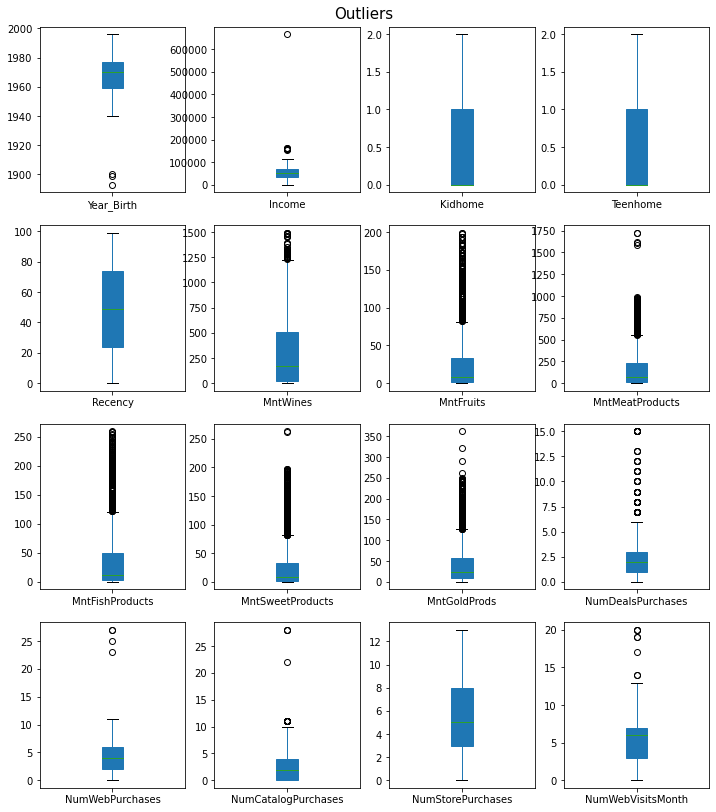

In [27]:
# Checking outliers

df_to_plot = df.drop(columns = ['ID','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain'])

#Subplots

df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.suptitle('Outliers', fontsize=15, y=0.9)
plt.savefig('boxplots.png', bbox_inches='tight')

### 1.1- Indentify any missing values and outliers and how to handle them ?

* There are 24 missing values detected within Income column which has been replaced by median number.
* I've indentified an outlier in mulitple columns and most of them seems natural except Year_brith column where an outlier occured at 1900 since it's impossible that someone born before 1900 still alive.Therefore, I've remove those outliers present in Year_birth column

In [28]:
df.Year_Birth.describe() # Year 1893 seems unrealistic

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

In [29]:
# Removing outliers

new_df = df[df.Year_Birth >= (df.Year_Birth.mean()-3*df.Year_Birth.std())]
new_df.Year_Birth.describe()

count    2237.000000
mean     1968.901654
std        11.701917
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

### 1.2- Is there any features that can be extracted from the given dataset ?

* Join_year: The year that person became a customer, which can be engineered from "Dt_Customer"
* Join_month: The month that person became a customer, which can be engineered from "Dt_Customer"
* Join_weekday: The day of the week that person became a customer, which can be engineered from "Dt_Customer"
* Minorhome: The total amount of minors in their family, which can be acquired by summing up by Kidhome and Teenhome.
* Total_Mnt: Total amount spent in the last two years, which can be acquired by summing up all the "Mnt"-related columns
* Total_num_purchase: Total number of purchases in the last two years, which can be acquired by summing up all the "Num"-related columns
* Total_accept: Total amount a customer accepted the offer in marketing campaign, which can be acquired by summing up all the "Accepted"-related columns and the "Response" column
* "AOV": AOV stands for the average order volumn of each customer, which can be engineerd by dividing Total_Mnt by Total_num_purchase

In [30]:
new_df.Dt_Customer = pd.to_datetime(new_df.Dt_Customer)

In [31]:
new_df.Dt_Customer.head()

0   2012-11-19
1   2013-11-15
2   2014-03-02
3   2013-02-20
4   2013-07-11
Name: Dt_Customer, dtype: datetime64[ns]

In [32]:
# Engineering new features

new_df["Join_year"] = new_df.Dt_Customer.dt.year
new_df["Join_month"] = new_df.Dt_Customer.dt.month
new_df["Join_weekday"] = new_df.Dt_Customer.dt.weekday
new_df["Minorhome"] = new_df.Kidhome + new_df.Teenhome
new_df["Total_Mnt"] = new_df.MntWines+ new_df.MntFruits+ new_df.MntMeatProducts+ new_df.MntFishProducts+ new_df.MntSweetProducts+ new_df.MntGoldProds
new_df["Total_num_purchase"] = new_df.NumDealsPurchases+ new_df.NumWebPurchases+ new_df.NumCatalogPurchases+ new_df.NumStorePurchases+ new_df.NumWebVisitsMonth 
new_df["Total_accept"] = new_df.AcceptedCmp1 + new_df.AcceptedCmp2  + new_df.AcceptedCmp3 + new_df.AcceptedCmp4 + new_df.AcceptedCmp5 + new_df.Response
new_df['AOV'] = new_df.Total_Mnt/new_df.Total_num_purchase

In [33]:
new_df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Country,Join_year,Join_month,Join_weekday,Minorhome,Total_Mnt,Total_num_purchase,Total_accept,AOV
862,4339,1970,PhD,Married,67353,0,1,2013-12-31,37,702,...,0,AUS,2013,12,1,1,913,30,0,30.433333
615,4220,1970,PhD,Married,59892,0,1,2013-11-02,26,73,...,0,CA,2013,11,5,1,87,10,0,8.700000
1597,7005,1981,Graduation,Single,58684,0,0,2014-06-16,71,479,...,0,SA,2014,6,0,0,813,23,1,35.347826
215,10270,1981,2n Cycle,Married,35523,1,0,2013-10-03,8,11,...,0,GER,2013,10,3,1,66,15,0,4.400000
1833,5229,1969,PhD,Together,54132,0,1,2014-02-16,81,30,...,0,GER,2014,2,6,1,42,12,0,3.500000
659,8746,1989,Graduation,Married,75433,1,0,2014-04-05,28,800,...,0,SP,2014,4,5,1,1188,25,2,47.520000
1604,7327,1959,PhD,Married,36732,1,1,2013-12-29,71,21,...,0,SP,2013,12,6,2,47,11,0,4.272727
482,7444,1969,Master,Married,42169,1,1,2013-10-19,20,19,...,0,SP,2013,10,5,2,30,14,0,2.142857
1817,3945,1947,PhD,Widow,68117,0,1,2013-03-10,80,618,...,0,SP,2013,3,6,1,930,31,2,30.000000
349,9701,1988,Graduation,Together,41883,1,0,2013-03-19,13,32,...,0,CA,2013,3,1,1,312,19,0,16.421053


### 1.3- Is there any plottable correlation can be drawn from the data ?

* I opted for the heatmap to see the correlation betweeen the variables. When it gets bluer, shows they are positively correlated and when its redder then its negatively correlated.

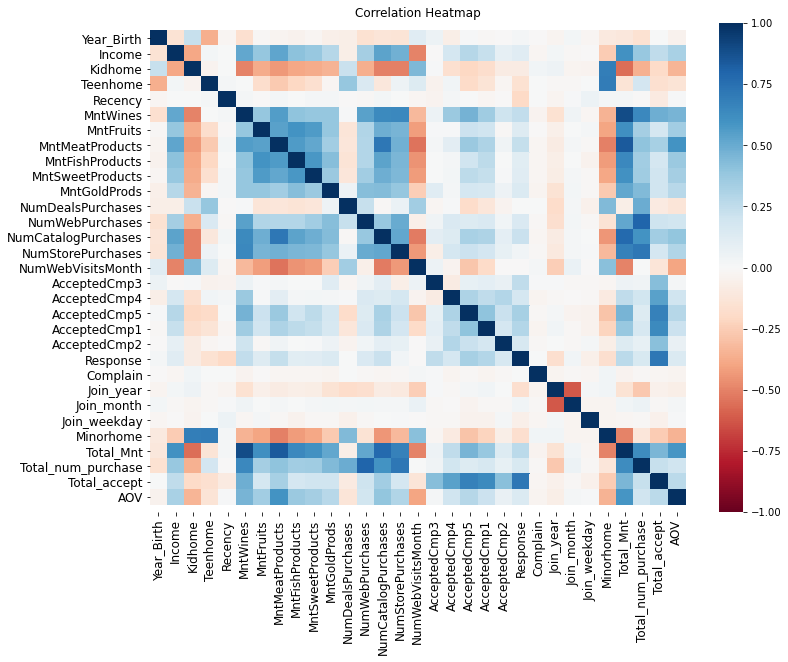

In [34]:
# Implementing heatmap

# Dropping ID column

df_to_plot= new_df.drop(columns=['ID'])

plt.figure(figsize = (12, 9))
s = sns.heatmap(df_to_plot.corr(),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig('heatmap.png', bbox_inches='tight')
plt.show()

### Heatmap Findings

 1.  High Earners

* High income individuals tends to spend and purchase more
* Tend to visit company's website less frequently than others
* Fewer number of purcahses made with discounts

2. Individuals with Kids

* Tends to visit company's website more frequently than other groups
* Not a very high purchasers and spenders 
* Favours discounted purchases nore frequently

3. High average order volume

* Tend to spend more on wine and meat products
* Not a frequent visitors of the company's website
* Prefer catalog and store purchases more often

### Anomalies 

* Surpisingly there is no correlation between complaints and total expenditure on our store in the last two years. Initially I thought that the more complaints would leads to less expenditure from a customer side. However, this is not the case due to very low amount of complaints made in the last two years (20) out of overall customer pool of (2200). Therefore,I believe that the customer service team did a remarkable job in keeping the numbers low.

In [35]:
new_df.Complain.sum() # Number of complaints made in the last two years

20

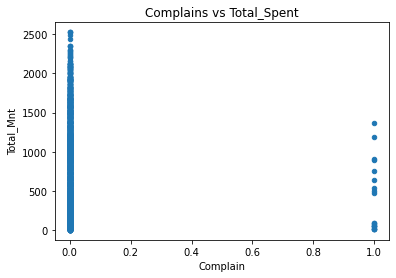

In [36]:
# Visulising Complaints vs Total Spent

new_df.plot(x='Complain', y='Total_Mnt', kind='scatter')
plt.title("Complains vs Total_Spent");

In [37]:
from scipy.stats import pearsonr

r, p_value  =  pearsonr(x=new_df['Complain'], y=new_df['Total_Mnt'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)


Pearson correlation (r):  -0.03373965091266399
Pearson p-value:  0.11063526070950919


In [38]:
new_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Join_year',
       'Join_month', 'Join_weekday', 'Minorhome', 'Total_Mnt',
       'Total_num_purchase', 'Total_accept', 'AOV'],
      dtype='object')

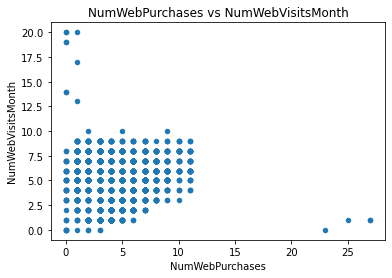

In [39]:
# Visulisaing NumWebPurchases & NumWebVisitsMonth

new_df.plot(x='NumWebPurchases', y='NumWebVisitsMonth', kind='scatter')
plt.title("NumWebPurchases vs NumWebVisitsMonth");

* Scatter plot visualisation doesn't show any correlation between Web visits and Web purhcases

### Section 2- What factors are significantly related to the number of store purchases?

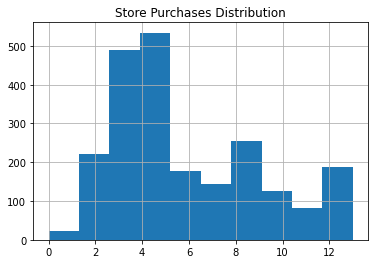

In [40]:
new_df.NumStorePurchases.hist()
plt.title("Store Purchases Distribution");

* Applying Random Forest Regressor to predict the number of store purchases and the model's feature importance technique to rank the top 7 factors related to store purchases 

In [41]:
# Dropping ID and Dt_customer columns
rf_df = new_df.drop(columns=['ID', 'Dt_Customer'])
rf_df.replace([np.inf, -np.inf], 0, inplace=True)

# One-hot encoding
rf_df = pd.get_dummies(rf_df)

# Import train_test_split 
from sklearn.model_selection import train_test_split

X = rf_df.drop(columns=['NumStorePurchases']) # Features
y = rf_df['NumStorePurchases']  # Target Variable

# Splitting dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  # 70% - 30% proportion

#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Classifier with 100 trees
rg = RandomForestRegressor(n_estimators=200, n_jobs=-1)

rg.fit(X_train, y_train)

y_pred= rg.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8136011904761905
Mean Squared Error: 1.6039732886904763
Root Mean Squared Error: 1.2664806704764493


* The range of NumStorePurchases is 13, and the Root Mean Squared Error is only 1.1 (less than 10% of the total range) which confirms the reliability of this model.

In [42]:
# Feature Importance 

feature_imp = pd.Series(rg.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

In [43]:
feature_imp

Total_Mnt              0.578905
AOV                    0.106515
Total_num_purchase     0.087227
NumCatalogPurchases    0.037758
NumWebPurchases        0.032394
NumWebVisitsMonth      0.032356
Income                 0.014033
MntGoldProds           0.013934
MntWines               0.010688
MntMeatProducts        0.009650
dtype: float64

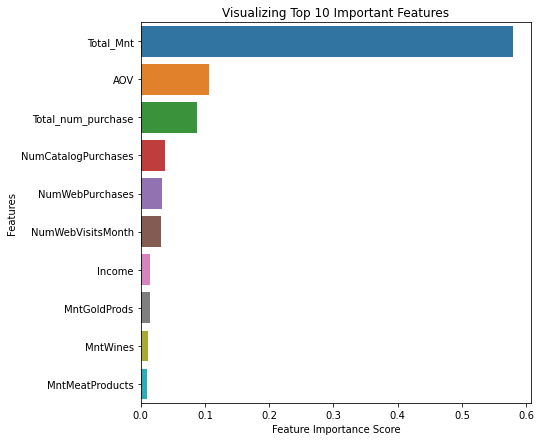

In [44]:
# Plotting feature importance bar chart

plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
#Labels
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.savefig('important_feautres.png', bbox_inches='tight')
plt.show()

Top 7 Factors related to store purchases

1. Total amount spent in the last two years
2. Average order volume
3. Total number of purchaes in the last two years
4. Catalog purchases in the last two years
5. Expenditure on wine in the last two years
6. Company's web vists
7. Web purchases through company's website in the last two years

In [45]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


 99%|===================| 667/672 [00:40<00:00]        

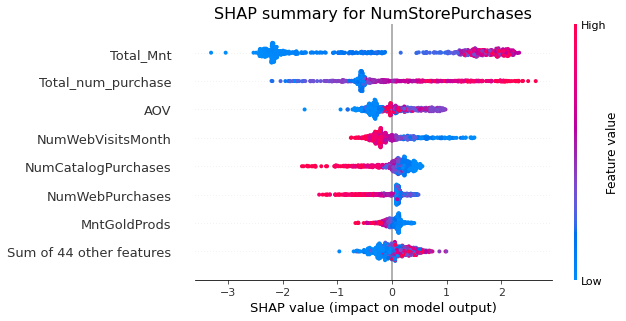

<Figure size 432x288 with 0 Axes>

In [46]:
import shap

# calculate shap values 
ex = shap.Explainer(rg, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for NumStorePurchases', size=16)
fig = shap.plots.beeswarm(shap_values, max_display=8)
plt.savefig('SHAP.png', bbox_inches='tight')
plt.show()


Finding:

1. The number of store purchases increases with higher total amount spent, higher total purchases, hight AOV and higher amount of wine purchases

2. The number of store purchases decreases with higher catalog purchases, higher vloume of web visits per month and puchases made via companys website.

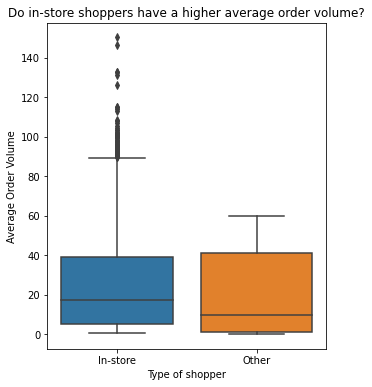

In [47]:
store_shoppers = new_df[new_df.NumStorePurchases>0]
store_shoppers = store_shoppers[store_shoppers.AOV <= (store_shoppers.AOV.mean()+3*store_shoppers.AOV.std())]
store_shoppers['Type of shopper'] = "In-store"
other_shoppers = new_df[new_df.NumStorePurchases==0]
other_shoppers['Type of shopper'] = "Other"

plt.figure(figsize = (5, 6))
all_shoppers = store_shoppers.append(other_shoppers)
plt.title("Do in-store shoppers have a higher average order volume?")
sns.boxplot(data = all_shoppers, x = 'Type of shopper', y = 'AOV')
plt.ylabel("Average Order Volume")
plt.savefig('AOV.png', bbox_inches='tight')

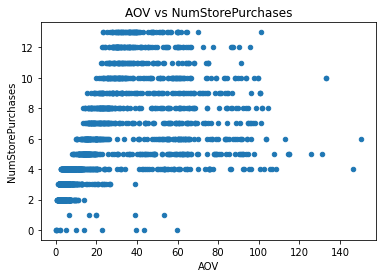

In [48]:
# Visualize AOV vs NumStorePurchases
all_shoppers.plot(x='AOV', y='NumStorePurchases', kind='scatter')
plt.title("AOV vs NumStorePurchases");
plt.savefig('AOV vs NumStorePurchases.png', bbox_inches='tight')

In [49]:
from scipy.stats import pearsonr
all_shoppers.replace([np.inf, -np.inf], 0, inplace=True)
r, p_value  =  pearsonr(x=all_shoppers['AOV'], y=all_shoppers['NumStorePurchases'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  0.5505389394031128
Pearson p-value:  2.0526348645442993e-177


### Section 2.1: Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test

* Yes! This statement is statistically correct as both features are positvely correlated

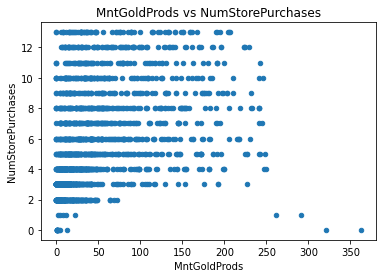

In [50]:
# Visualising a relationship between MntGoldProds vs NumStorePurchases

new_df.plot(x='MntGoldProds',y='NumStorePurchases', kind='scatter')
plt.title("MntGoldProds vs NumStorePurchases");
plt.savefig('MntGoldProds vs NumStorePurchases.png', bbox_inches='tight')

In [51]:
r, p_value  =  pearsonr(x=new_df['MntGoldProds'], y=new_df['NumStorePurchases'])

# print results
print('Pearson correlation (r): ', r)
print('Pearson p-value: ', p_value)

Pearson correlation (r):  0.383264186347043
Pearson p-value:  3.4668974417790955e-79


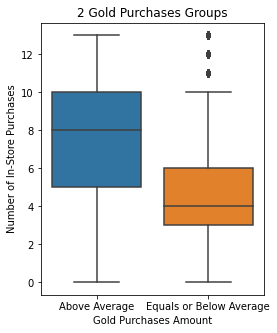

In [52]:
gold_above_avg =  new_df[new_df.MntGoldProds > new_df.MntGoldProds.mean()]
gold_above_avg['Gold Purchases Amount'] = "Above Average"
gold_equ_or_below_avg =  new_df[new_df.MntGoldProds <= new_df.MntGoldProds.mean()]
gold_equ_or_below_avg['Gold Purchases Amount'] = "Equals or Below Average"

plt.figure(figsize = (4, 5))
df_gold = gold_above_avg.append(gold_equ_or_below_avg)
plt.title("2 Gold Purchases Groups")
sns.boxplot(data = df_gold, x = 'Gold Purchases Amount', y = 'NumStorePurchases')
plt.ylabel("Number of In-Store Purchases");

### Section 2.3 - Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?

* Accoring to box plot visualisation Married PhD couple spend less on fish products compared to the rest.

In [53]:
new_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Join_year',
       'Join_month', 'Join_weekday', 'Minorhome', 'Total_Mnt',
       'Total_num_purchase', 'Total_accept', 'AOV'],
      dtype='object')

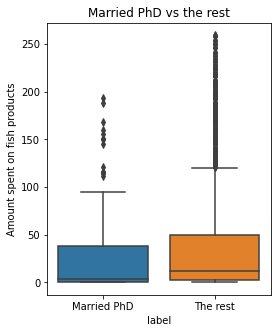

In [54]:
# Splitting data into two sub groups : Maried PhD and the rest

married_phd = new_df[(new_df.Education == "PhD") & (new_df.Marital_Status == "Married")]
married_phd['label'] = "Married PhD"
the_rest = new_df[(new_df.Education != "PhD") | (new_df.Marital_Status != "Married")]
the_rest['label'] = "The rest"

df_combined = married_phd.append(the_rest)
plt.figure(figsize = (4, 5))
plt.title("Married PhD vs the rest")
sns.boxplot(data = df_combined, x = 'label', y = 'MntFishProducts')
plt.ylabel("Amount spent on fish products");
plt.savefig('Married PhD vs the rest.png', bbox_inches='tight')

In [55]:
# use t-test to test these two groups have the same mean
from scipy.stats import ttest_ind 

#This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 
#This test assumes that the populations have identical variances by default.
pval = ttest_ind(married_phd.MntFishProducts, the_rest.MntFishProducts).pvalue
print("T-test p-value: ", pval)

T-test p-value:  0.005297012242158541


### Section 3.1 - Which marketing campaign is most successful ?

* The last marketing campaigns is most successfull

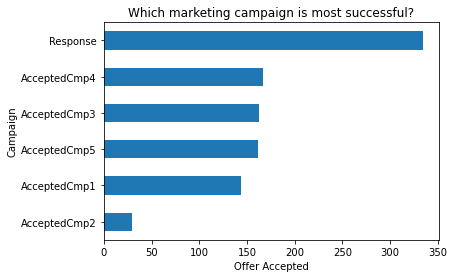

In [56]:
new_df[["AcceptedCmp1", "AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum().sort_values().plot.barh()
plt.title("Which marketing campaign is most successful?")
plt.xlabel("Offer Accepted");
plt.ylabel("Campaign")
plt.savefig('Which marketing campaign is most successful.png', bbox_inches='tight')

### Section 3.2 - What does the average customer look like for this company?

* Has an Average Order Value of 26.8 dollars
* Has an annual income of 50K
* Become a customer in mid-June
* Spent most of wine products (303 dollars) and then on meat products (166 dollars)
* Spent least on Fruits (26.3 dollars) and and sweet products (27 dollars)
* Total expenditure of 605 dollars
* Has purchased at least 20 times from the store

In [57]:
new_df.replace([np.inf, -np.inf], 0, inplace=True)

In [58]:
new_df.mean()

ID                      5590.726419
Year_Birth              1968.901654
Income                 50126.302637
Kidhome                    0.444345
Teenhome                   0.506482
Recency                   49.104604
MntWines                 303.995530
MntFruits                 26.270451
MntMeatProducts          166.916853
MntFishProducts           37.523022
MntSweetProducts          27.068842
MntGoldProds              43.968708
NumDealsPurchases          2.326777
NumWebPurchases            4.087170
NumCatalogPurchases        2.662494
NumStorePurchases          5.794367
NumWebVisitsMonth          5.319177
AcceptedCmp3               0.072865
AcceptedCmp4               0.074654
AcceptedCmp5               0.072418
AcceptedCmp1               0.064372
AcceptedCmp2               0.013411
Response                   0.149307
Complain                   0.008941
Join_year               2013.027716
Join_month                 6.465802
Join_weekday               2.988824
Minorhome                  0

### Section 3.3- Which marketing channels are underperforming?

* Catalog is the most underperforming channel.

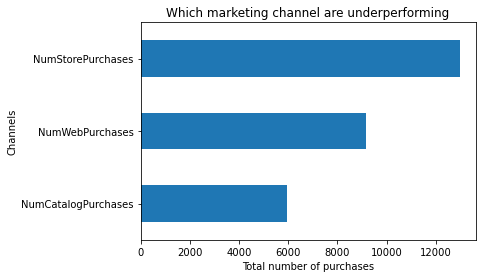

In [59]:
new_df[["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases"]].sum().sort_values().plot.barh()
plt.title("Which marketing channel are underperforming")
plt.xlabel("Total number of purchases")
plt.ylabel("Channels");

### Further Analysis:

As we know that last campaign (Response) is the most successfull one, we can further drill down the difference between customer characterstics and purchase behavior between the most successfull campaign (last one), and the rest of the campaigns (1-5).

*  Customer Characterstics: 'Year_Birth', 'Income', Minorhome', 'Country', 'Join_month', 'Join_weekday'


* Purchase behaviors: 

* Products: 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts'
* Channel: 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
* Total: 'Total_Mnt', 'Total_num_purchase', 'AOV'


In [70]:
# Creating 2 groups that accepted offer via last campaign (Response) and the rest (1-5)
cp_last = new_df[new_df.Response > 0]
cp__the_rest = new_df[new_df.AcceptedCmp2 == 0]

cp_last.shape[0], cp__the_rest.shape[0]

(334, 2207)

In [71]:
new_df.Country.value_counts()

SP     1094
SA      336
CA      268
AUS     160
IND     147
GER     120
US      109
ME        3
Name: Country, dtype: int64

In [72]:
# remove the overlapping customers who accepted offers from both cp_last and cp__the_rest 
# so that we can see the clear differences between these two groups
cp__the_rest2 = cp__the_rest
for i in list(cp__the_rest.ID):
    if i in list(cp_last.ID):
        cp__the_rest2 = cp__the_rest2[cp__the_rest2.ID != i]
        
cp_last.shape[0], cp__the_rest2.shape[0]

(334, 1893)

In [73]:
new_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Join_year',
       'Join_month', 'Join_weekday', 'Minorhome', 'Total_Mnt',
       'Total_num_purchase', 'Total_accept', 'AOV'],
      dtype='object')

In [75]:
# Creating new list

cp_last = cp_last[['Year_Birth','Income', 'Minorhome',  'Country', 'Join_month', 'Join_weekday',  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','Total_Mnt', 'Total_num_purchase', 'AOV']]
cp__the_rest2 = cp__the_rest2[['Year_Birth','Income', 'Minorhome',  'Country', 'Join_month', 'Join_weekday',  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','Total_Mnt', 'Total_num_purchase', 'AOV']]

In [76]:
cp_last.mean()

Year_Birth              1969.416168
Income                 57698.505988
Minorhome                  0.646707
Join_month                 6.739521
Join_weekday               2.700599
MntWines                 502.703593
MntFruits                 38.203593
MntMeatProducts          294.353293
MntFishProducts           52.050898
MntSweetProducts          38.634731
NumWebPurchases            5.071856
NumCatalogPurchases        4.203593
NumStorePurchases          6.095808
Total_Mnt                987.392216
Total_num_purchase        23.000000
AOV                       41.829197
dtype: float64

In [77]:
# Average Customer Dataframe

new_df2 = new_df[['Year_Birth', 'Income', 'Minorhome', 'Country', 'Join_month', 'Join_weekday',
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'Total_Mnt', 'Total_num_purchase', 'AOV']]
new_df2.mean()

Year_Birth              1968.901654
Income                 50126.302637
Minorhome                  0.950827
Join_month                 6.465802
Join_weekday               2.988824
MntWines                 303.995530
MntFruits                 26.270451
MntMeatProducts          166.916853
MntFishProducts           37.523022
MntSweetProducts          27.068842
NumWebPurchases            4.087170
NumCatalogPurchases        2.662494
NumStorePurchases          5.794367
Total_Mnt                605.743406
Total_num_purchase        20.189987
AOV                       26.842831
dtype: float64

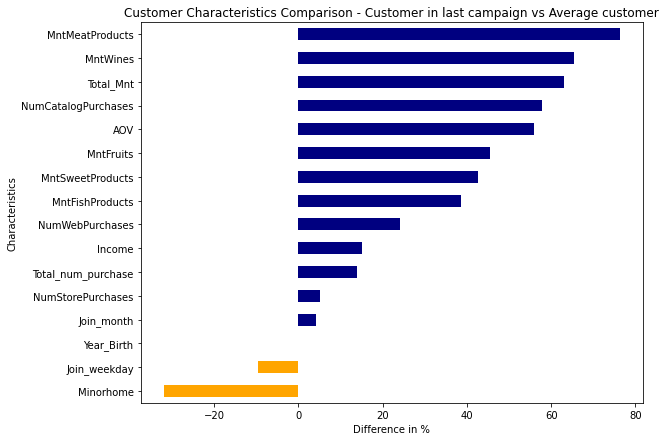

In [78]:
# visualize the differences
plt.figure(figsize = (9, 7))
value1 = pd.DataFrame((((cp_last.mean()) - new_df2.mean()) / new_df2.mean())*100)
value1.dropna(inplace = True)
value1.sort_values(by=0,inplace = True)
value1['positive'] = value1[0] >=0
value1[0].plot(kind='barh', color=value1.positive.map({True: 'navy', False: 'orange'}))
plt.title("Customer Characteristics Comparison - Customer in last campaign vs Average customer")
plt.xlabel("Difference in %")
plt.ylabel("Characteristics");

In [79]:
cp__the_rest2.mean()

Year_Birth              1968.807184
Income                 48709.295298
Minorhome                  1.005283
Join_month                 6.409403
Join_weekday               3.032752
MntWines                 265.836767
MntFruits                 24.267829
MntMeatProducts          144.358690
MntFishProducts           34.996302
MntSweetProducts          25.112520
NumWebPurchases            3.918119
NumCatalogPurchases        2.384046
NumStorePurchases          5.728473
Total_Mnt                535.491812
Total_num_purchase        19.681986
AOV                       24.083059
dtype: float64

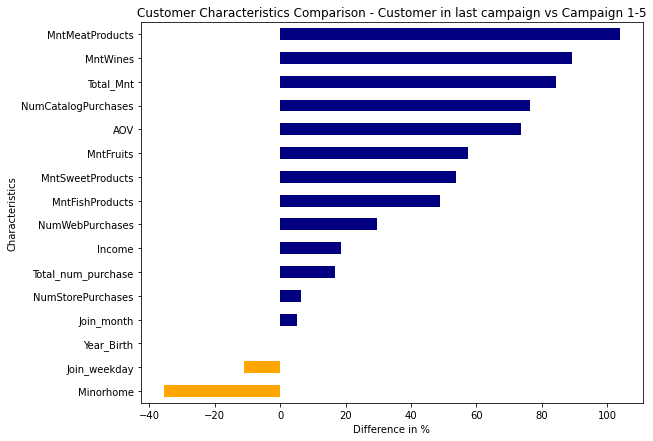

In [80]:
# visualize the differences
plt.figure(figsize = (9, 7))
value1 = pd.DataFrame((((cp_last.mean()) - cp__the_rest2.mean()) / cp__the_rest2.mean())*100)
value1.dropna(inplace = True)
value1.sort_values(by=0,inplace = True)
value1['positive'] = value1[0] >=0
value1[0].plot(kind='barh', color=value1.positive.map({True: 'navy', False: 'orange'}))
plt.title("Customer Characteristics Comparison - Customer in last campaign vs Campaign 1-5")
plt.xlabel("Difference in %")
plt.ylabel("Characteristics");

### Insights:

* Customers spent nearly two times more money on meat and wine products in the last campaign comapred to previous campaigns.
* Last campaign attracted more valuable customers in terms of AOV, total amount spent and total purchases compared to all previous campaigns.
* There is also an increase of income by 20% in the last campaigns compared to previous campaigns.
* A steady increase across all purchasing channels. 

In [87]:
# Checking the effects of Last campaign vs The Rest by Country

cp_last_country = pd.DataFrame((cp_last.Country.value_counts()/cp_last.shape[0])*100)
cp_last_country.rename(columns={'Country':'Percent'}, inplace=True)
cp_last_country['country'] = cp_last_country.index
cp_last_country = cp_last_country.sort_values('country')
cp_last_country.drop(['country'], axis=1, inplace=True)
cp_last_country

,Percent
AUS,6.886228
CA,11.377246
GER,5.089820
IND,3.892216
ME,0.598802
SA,15.568862
SP,52.694611
US,3.892216


In [89]:
cp__the_rest2_country = pd.DataFrame((cp__the_rest2.Country.value_counts()/cp__the_rest2.shape[0])*100)
cp__the_rest2_country.rename(columns={'Country':'Percent'}, inplace=True)
cp__the_rest2_country['country'] = cp__the_rest2_country.index
cp__the_rest2_country = cp__the_rest2_country.sort_values('country')
cp__the_rest2_country.drop(['country'], axis=1, inplace=True)
cp__the_rest2_country

,Percent
AUS,7.237190
CA,12.097200
GER,5.335446
IND,7.025885
ME,0.052826
SA,14.896989
SP,48.283148
US,5.071315


In [90]:
country_final = cp_last_country-cp__the_rest2_country

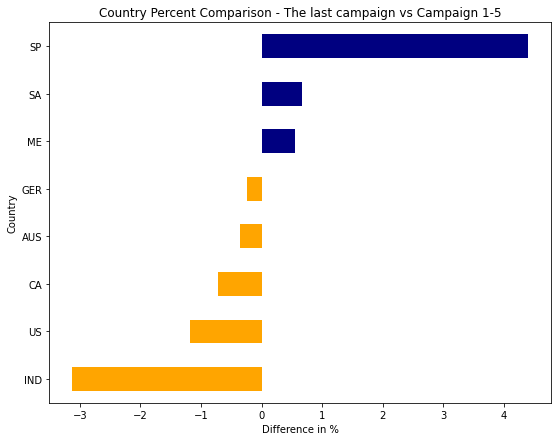

In [91]:
# Visualise the difference 

plt.figure(figsize = (9, 7))
country_final.sort_values(by="Percent",inplace = True)
country_final['positive'] = country_final["Percent"] >=0
country_final["Percent"].plot(kind='barh', color=country_final.positive.map({True: 'navy', False: 'orange'}))
plt.title("Country Percent Comparison - The last campaign vs Campaign 1-5")
plt.xlabel("Difference in %")
plt.ylabel("Country")
plt.savefig('Country Percent Comparison - The last campaign vs Campaign 1-5', bbox_inches='tight');

* Spain attracted more customer by +4% compared to India which given us a -3% customer attaction

In [92]:
new_df.Country.value_counts()

SP     1094
SA      336
CA      268
AUS     160
IND     147
GER     120
US      109
ME        3
Name: Country, dtype: int64

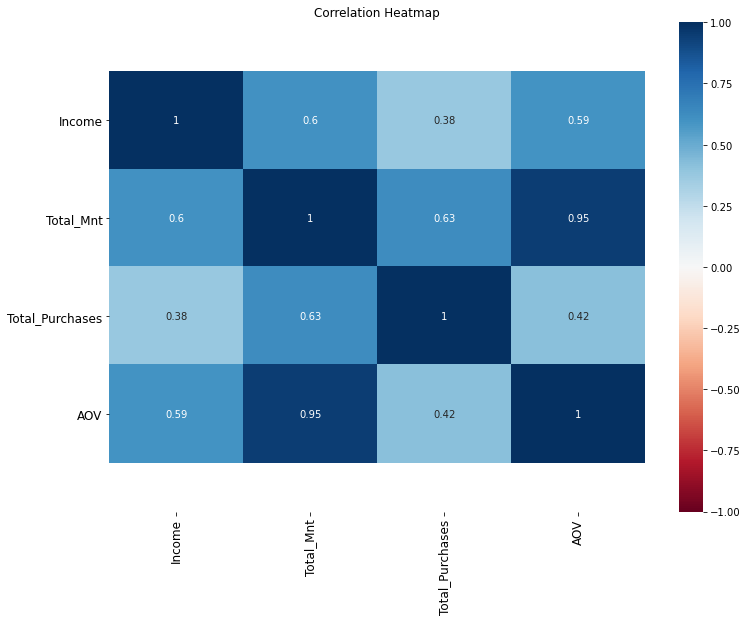

In [93]:
# select columns to plot
new_df2 = new_df[new_df.AOV <= (new_df.AOV.mean()+3*new_df.AOV.std())]
new_df2.replace([np.inf, -np.inf], 0, inplace=True)
new_df2 = new_df2[new_df2.Total_num_purchase <= (new_df2.Total_num_purchase.mean()+3*new_df2.Total_num_purchase.std())]
new_df2 = new_df2[new_df2.Total_Mnt <= (new_df2.Total_Mnt.mean()+3*new_df2.Total_Mnt.std())]

df_to_plot = new_df2[['Income', 'Total_Mnt','Total_num_purchase', 'AOV']]
df_to_plot.rename(columns={'Total_num_purchase':'Total_Purchases'}, inplace=True)

# create heatmap
plt.figure(figsize = (12, 9))
s = sns.heatmap(df_to_plot.corr(),  annot = True,cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
bottom, top = s.get_ylim()
s.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap")
plt.savefig('heatmap2.png', bbox_inches='tight')
plt.show()

In [94]:
# drop ID as everyone has unique ID
rd_df = new_df.drop(columns=['ID', 'Dt_Customer','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response'])
rd_df.replace([np.inf, -np.inf], 0, inplace=True)

# One-hot encoding
rd_df = pd.get_dummies(rd_df)

# Import train_test_split function
from sklearn.model_selection import train_test_split

X=rd_df.drop(columns=['Total_accept'])  # Features
y=rd_df['Total_accept']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 
# 70% training and 30% test

#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Classifier with 100 trees
rg2 = RandomForestRegressor(n_estimators=200, n_jobs=-1)

#Train the model using the training sets y_pred=clf.predict(X_test)
rg2.fit(X_train, y_train)

y_pred=rg2.predict(X_test)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4326054067460317
Mean Squared Error: 0.4871914779472553
Root Mean Squared Error: 0.6979910299905403


In [95]:
from scipy.stats import pearsonr

list_ = ['MntWines', 'MntMeatProducts','MntGoldProds', 'MntFishProducts', 'MntFruits',  'MntSweetProducts']
for i in list_:
    r, p_value  =  pearsonr(x=new_df[i], y=new_df['Total_accept'])
    print(i, "vs Total_accept:")
    # print results
    print('Pearson correlation (r): ', r)
    print('Pearson p-value: ', p_value)
    print(" ")

MntWines vs Total_accept:
Pearson correlation (r):  0.4889081124487899
Pearson p-value:  9.223637029077792e-135
 
MntMeatProducts vs Total_accept:
Pearson correlation (r):  0.3297331670569111
Pearson p-value:  7.01747618342851e-58
 
MntGoldProds vs Total_accept:
Pearson correlation (r):  0.2029297957234708
Pearson p-value:  3.2094915571709904e-22
 
MntFishProducts vs Total_accept:
Pearson correlation (r):  0.17953496105382538
Pearson p-value:  1.1652966258985298e-17
 
MntFruits vs Total_accept:
Pearson correlation (r):  0.1720830948804731
Pearson p-value:  2.492172601773955e-16
 
MntSweetProducts vs Total_accept:
Pearson correlation (r):  0.1990766715564785
Pearson p-value:  1.986090070292314e-21
 


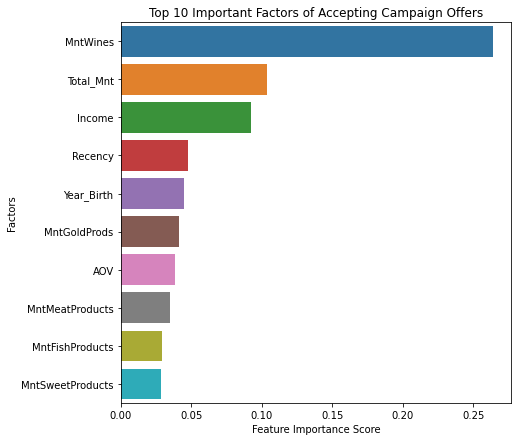

In [97]:
# find feature importance scores
import pandas as pd
feature_imp = pd.Series(rg2.feature_importances_, 
        index = list(X.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

# Creating a bar plot
plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Factors')
plt.title("Top 10 Important Factors of Accepting Campaign Offers")
plt.savefig('important_feautres.png', bbox_inches='tight')
plt.show()

In [98]:
new_df[['Join_month', 'Join_weekday']].mean()

Join_month      6.465802
Join_weekday    2.988824
dtype: float64

### Section 4 - Reccomendations

### Project Goal

The goal of this project is to identify the reasons behind the ineffective marketing campaigns. Therefore, I needed to analyse the dataset to understand this problem and proposed a data-driven solitions.

### Summaries drawn from the dataset

* The last campaign performed twice as good as previous campaigns
* Spain attracted more customer by +4% compared to India which given us a -3% customer attaction
* Customers spent nearly two times more money on meat and wine products in the last campaign comapred to previous campaigns.
* Last campaign attracted more valuable customers in terms of AOV, total amount spent and total purchases compared to all previous campaigns.
* There is also an increase of income by 20% in the last campaigns compared to previous campaigns.
* A steady increase across all purchasing channels.


* High spending customers shop through physical stores, where people normally tend to spend more due to an impulsive purchase behavior due to the layout  within stores.


People with kids at home are less valuable as they
* likely to purchase less or prefer purchase made with discount

An Average Customer
* becomes member on Thursday
* becomes member in mid-June



### Data-Driven Solutions 

#### On Acquisition:

1- Keep using the same marketing techniques in the last campaign, and with a focus on promoting meat products and wines

2- Try to spend more marketing budget in Spain, and less in India

3- Try to have a brand discount day on Thursday or a brand discount month in June to attract new customers

#### On Increasing revenue:

1- Have marketing campaigns to convert customers who shop mostly on a website or catalog to in-store purchasers as most in-store purchases have high average order volume.

2- Build a loyalty program to make high-income customers loyal as long as possible